# Assignment 4
Using LoR and Newton's Method, predict if a student would get admission from the 2 exams.   
Submitted by: **IEC2016012**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('exam.txt', names = ['exam1', 'exam2', 'adm'])
df.head()

,exam1,exam2,adm
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.shape

(100, 3)

In [4]:
y = df['adm'].values
X = df.drop(['adm'], axis=1).values
print(X.shape, y.shape)

(100, 2) (100,)


In [5]:
msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
print(X_train.shape, X_test.shape)

(72, 2) (28, 2)


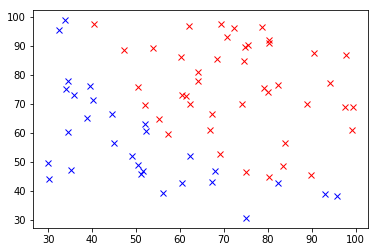

In [6]:
for i in range(X_train.shape[0]):
    if y_train[i]==1:
        plt.plot(X_train[i,0],X_train[i,1],'rx')
    else:
        plt.plot(X_train[i,0],X_train[i,1],'bx')
plt.show()

In [7]:
#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))

In [8]:
#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(72, 3)


In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sig_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [10]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(theta)

def get_h(X, theta):
    h = sigmoid(X@theta.T)
    h = h.reshape(-1)
    return h

h = get_h(X_train, theta)
print(h.shape)

[[0.77958    0.01529851 0.95936007]]
(72,)


In [11]:
def get_cost(h,y):
    return -(1/m)*(y.T@np.log(1-h) + (1-y).T@np.log(1-h))
# get_cost(h,y)

In [12]:
def gd(X,y,theta,alpha,lam,it):
    i=0
    while(i<it):
        h = sigmoid(X@theta.T).reshape(-1)
        theta = theta - alpha/m*(X.T@(h-y)) - lam/m*np.sum(theta[:,1:])
#         theta = theta*(1-(alpha*lam/m)) - alpha/m*(X.T@(h-y)) 
        i+=1
    return theta

## Without regularization

In [13]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100

for alpha in alphas:
    thetax = gd(X_train,y_train,theta,alpha,0,10000) #Regularization=0

    #Testing
    h = sigmoid(X_test@thetax.T)
    h = (h>=0.5)*1
    h = h.reshape(-1)
#     err = np.sum(np.abs(h-y))/y.shape[0]
    acc = np.sum(h==y_test)/y_test.shape[0]
    print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))


Alpha = 0.0001, Accuracy % = 0.6071428571428571
Alpha = 0.001, Accuracy % = 0.6071428571428571
Alpha = 0.01, Accuracy % = 0.9642857142857143
Alpha = 0.1, Accuracy % = 0.9642857142857143


## With regularization

In [14]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100
lams = [0,0.001,0.01,0.1,1,10]

for lam in lams:
    print("Lambda = " + str(lam))
    for alpha in alphas:
        thetax = gd(X_train,y_train,theta,alpha,lam,10000)
        
        #Testing
        h = sigmoid(X_test@thetax.T)
        h = (h>=0.5)*1
        h = h.reshape(-1)
    #     err = np.sum(np.abs(h-y))/y.shape[0]
        acc = np.sum(h==y_test)/y_test.shape[0]
        print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))
    print("--------------------------")

Lambda = 0
Alpha = 0.0001, Accuracy % = 0.6071428571428571
Alpha = 0.001, Accuracy % = 0.6071428571428571
Alpha = 0.01, Accuracy % = 0.9642857142857143
Alpha = 0.1, Accuracy % = 0.9642857142857143
--------------------------
Lambda = 0.001
Alpha = 0.0001, Accuracy % = 0.6071428571428571
Alpha = 0.001, Accuracy % = 0.6428571428571429
Alpha = 0.01, Accuracy % = 0.9642857142857143
Alpha = 0.1, Accuracy % = 0.9642857142857143
--------------------------
Lambda = 0.01
Alpha = 0.0001, Accuracy % = 0.5714285714285714
Alpha = 0.001, Accuracy % = 0.75
Alpha = 0.01, Accuracy % = 0.9285714285714286
Alpha = 0.1, Accuracy % = 0.9285714285714286
--------------------------
Lambda = 0.1
Alpha = 0.0001, Accuracy % = 0.5714285714285714
Alpha = 0.001, Accuracy % = 0.5714285714285714
Alpha = 0.01, Accuracy % = 0.6071428571428571
Alpha = 0.1, Accuracy % = 0.8928571428571429
--------------------------
Lambda = 1
Alpha = 0.0001, Accuracy % = 0.5714285714285714
Alpha = 0.001, Accuracy % = 0.5
Alpha = 0.01, Accu

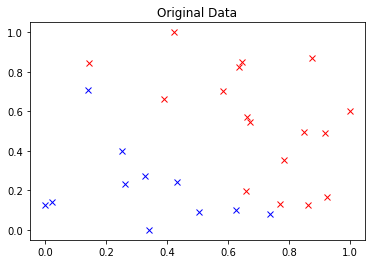

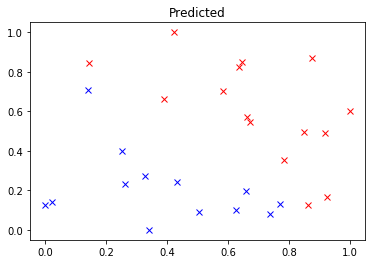

In [15]:
thetax = gd(X_train,y_train,theta,0.01,0.01,10000)

h = sigmoid(X_test@thetax.T)
h = (h>=0.5)*1
h = h.reshape(-1)

def plot_graph(X,y,h):
    mask = y==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title("Original Data")
    plt.show()

    mask = h==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title('Predicted')
    plt.show()
    
plot_graph(X_test,y_test,h)

## Conclusion
An approximate accuracy of 90% is obtained with alpha 0.01 and lambda 0.01.

# Newton's Method

In [16]:
df = pd.read_csv('exam.txt', names = ['exam1', 'exam2', 'adm'])
y = df['adm'].values
X = df.drop(['adm'], axis=1).values

msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))

#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)

m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(X_train.shape, y_train.shape, m, n, theta.shape)

(61, 3) (61,) 61 3 (1, 3)


In [17]:
def newton(x, y, m, w):
    delta_J = np.zeros((x.shape[1],1))
    for i in range(1,m):
        z = np.matmul(x[i],w)
        h = 1/(1 + np.exp(-z))
        x_dum = x[i]
        x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
        x_dum = (h-y[i])*x_dum
        delta_J = np.add(delta_J , x_dum)
    
#     print(x.shape)
#     print(y.shape)
#     print(delta_J)
#     print(delta_J.shape)
    
    J_prev = 100
    iterations = 0
    log = np.array([])
    
    while(iterations<10):
        # Finding Hessian
        Hessian = np.zeros((n,n))
        for i in range(1,m):
            h = sigmoid(x[i]@w) 
            x_dum = x[i]
            x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
            Hessian =  np.add(Hessian,(h*(1-h)*(x_dum.T@x_dum)))
        
        #Finding gradient
        grad = np.zeros((x.shape[1],1))
        for i in range(1,m):
            h = sigmoid(x[i]@w)
            x_dum = x[i]
            x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
            x_dum = (h-y[i])*x_dum
            grad = np.add(grad, x_dum)
        
        if not np.any(Hessian) != 0:
            Hessian_inv = inv(Hessian)
        else:
            break
        w = np.subtract(w,Hessian_inv@grad)
        print("w = " , w)
        z = np.dot(x,w)
        J_prev = J

        log = np.append(log, J)
        iterations+=1
#     print("Number of iterations taken: " + str(iterations))
    return w

m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(n,1)
theta = newton(X_train,y_train,m,theta)
print(theta)

Number of iterations taken: 0
[[0.31206969]
 [0.53731421]
 [0.74249994]]


In [18]:
h_test_ = sigmoid(X_test@theta)>0.5
h_test = (h_test_>=0.5)*1
h_test = h_test.reshape(-1)

In [19]:
acc = np.sum(h_test == y_test)/h.shape
print(acc)

[0.96428571]


## Conclusion
The accuracy obtained from either of the methods ie. Logistic Regression and Newton's method. The iterations taken by newtons method is far less than that taken by LoR. The accuracy achieved by Newton's method is better than that the accuracy obtained by Logistic Regression.   

Accuracy obtained by:  
LoR : $92$%   
Newton's Method : $96$%